In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in our dataset
df = pd.read_csv('Ames_Housing_Data.csv')

In [4]:
# looking at the first 5 rows
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# uderstanding the features of the data set
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

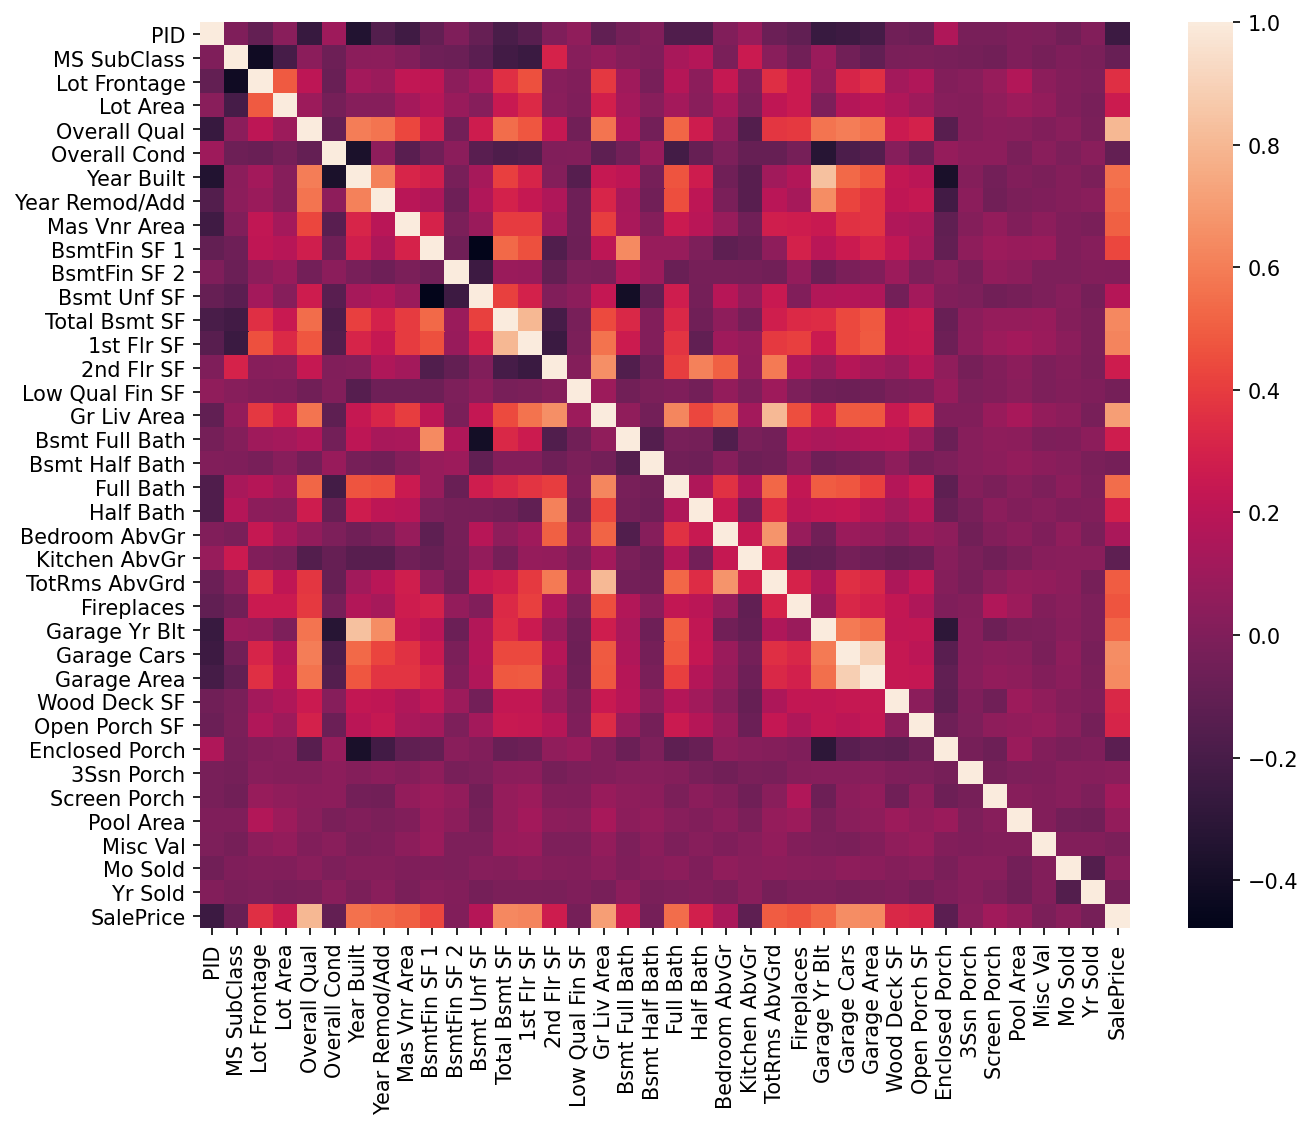

In [7]:
# Visualizing the correlations between all features
plt.figure(figsize=(10,8),dpi=150)
sns.heatmap(df.corr())
plt.savefig('correlation_map.png')

In [8]:
# seeing correlations associated with just the sales price
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


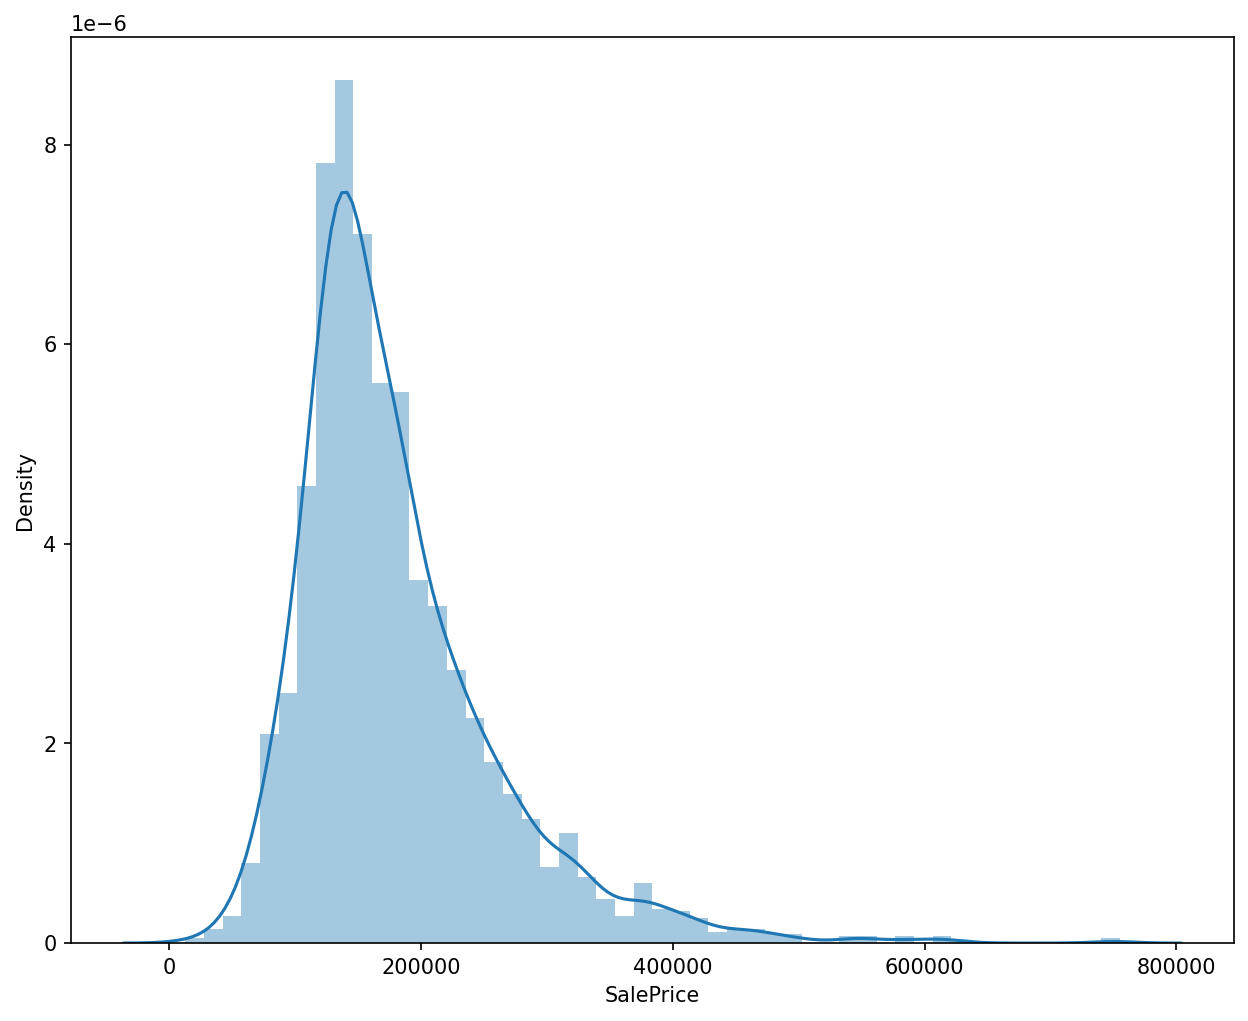

In [9]:
# vizualizing the distribution of sales
plt.figure(figsize=(10,8),dpi=150)
sns.distplot(df['SalePrice'])
plt.savefig('sales_price_distribution.png')

# Finding and dropping outliers

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

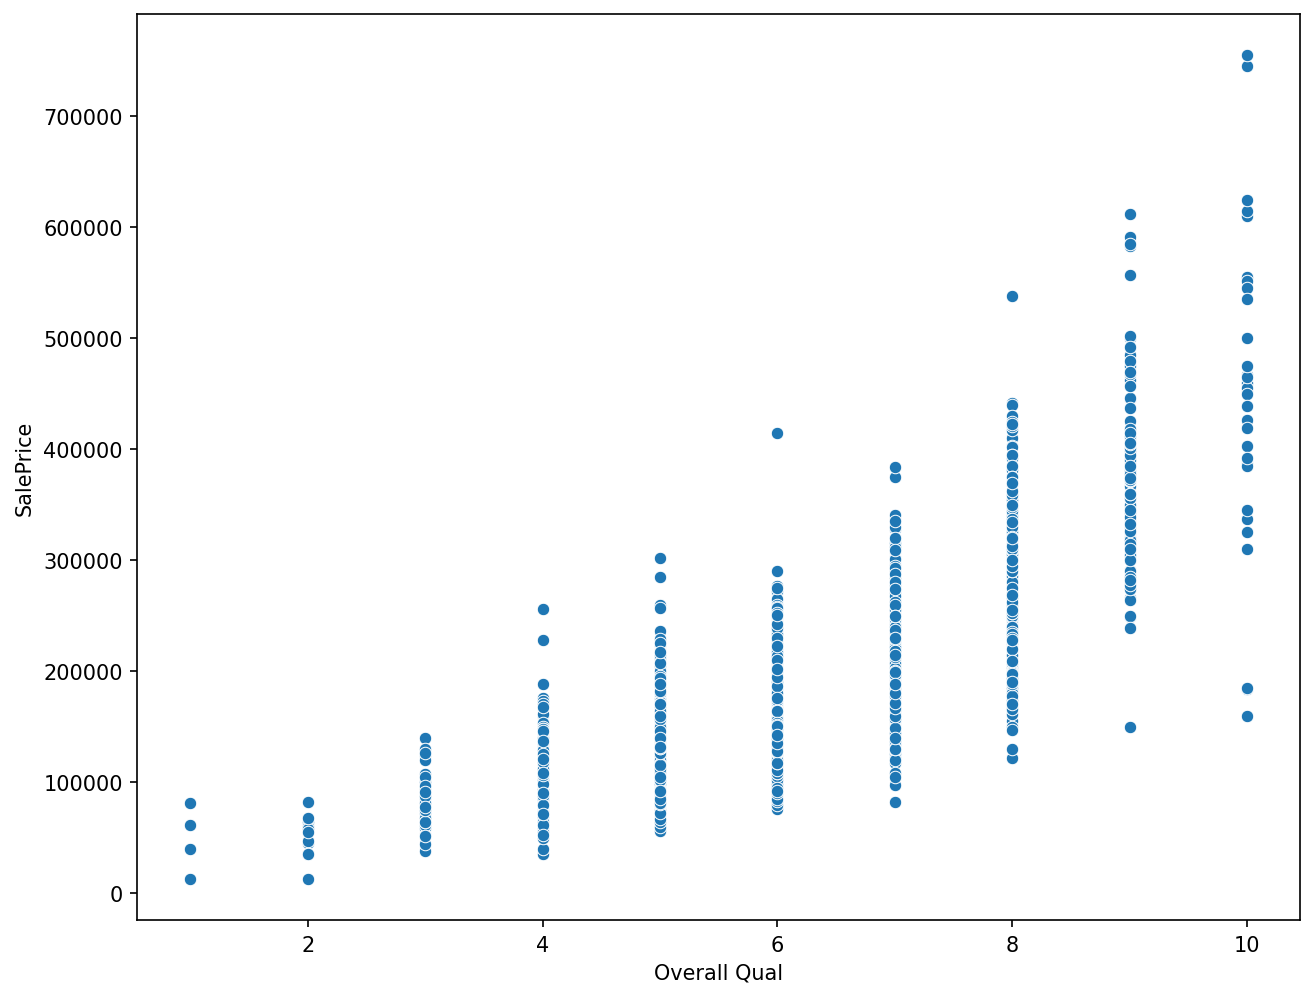

In [10]:
# vizualizing the distribution between overall qual and sale price
plt.figure(figsize=(10,8),dpi=150)
sns.scatterplot(data=df, x = 'Overall Qual', y= 'SalePrice')

In [11]:
# seeing our outliers where overall qaul was greater than 8 and saleprice less than average 
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

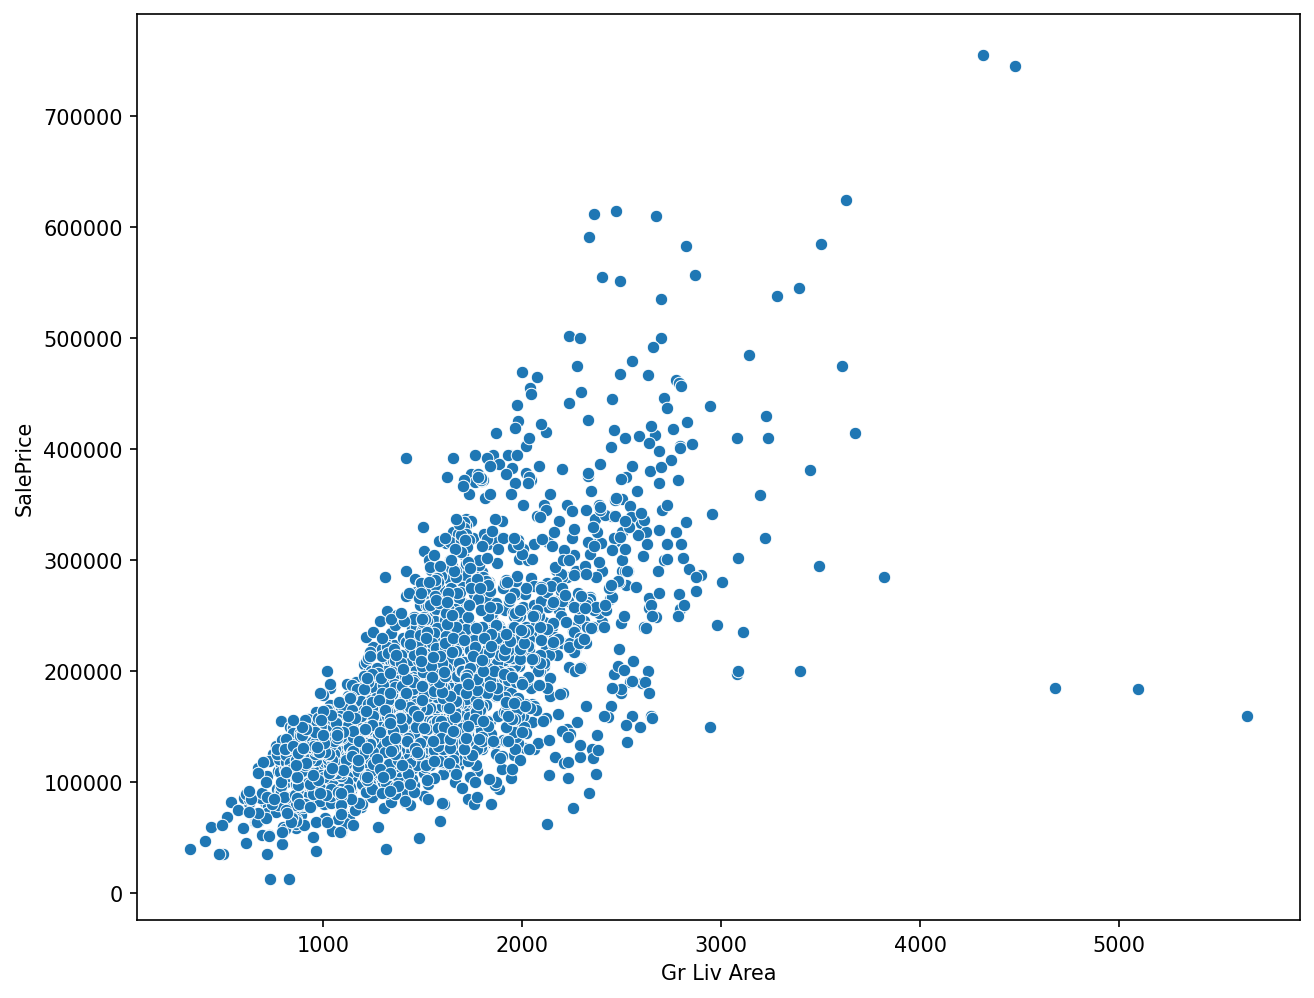

In [13]:
plt.figure(figsize=(10,8),dpi=150)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [14]:
# finding which ones are the outliers
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [15]:
# grabbing the index for the outliers
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [16]:
# dropping the outliers
df = df.drop(ind_drop,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

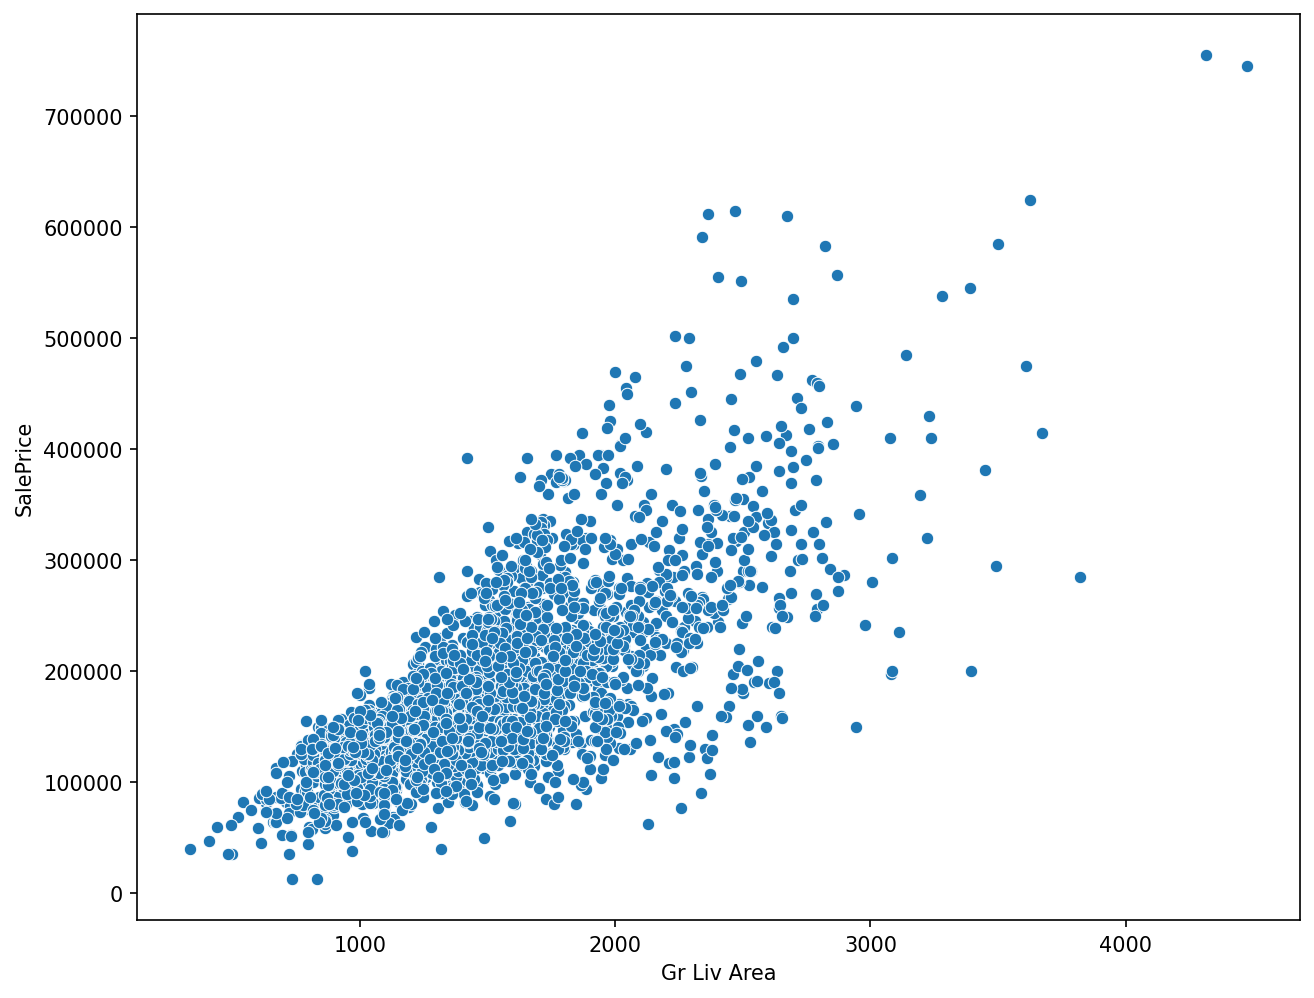

In [17]:
# visualizing the new df with the outlier index dropped
plt.figure(figsize=(10,8),dpi=150)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

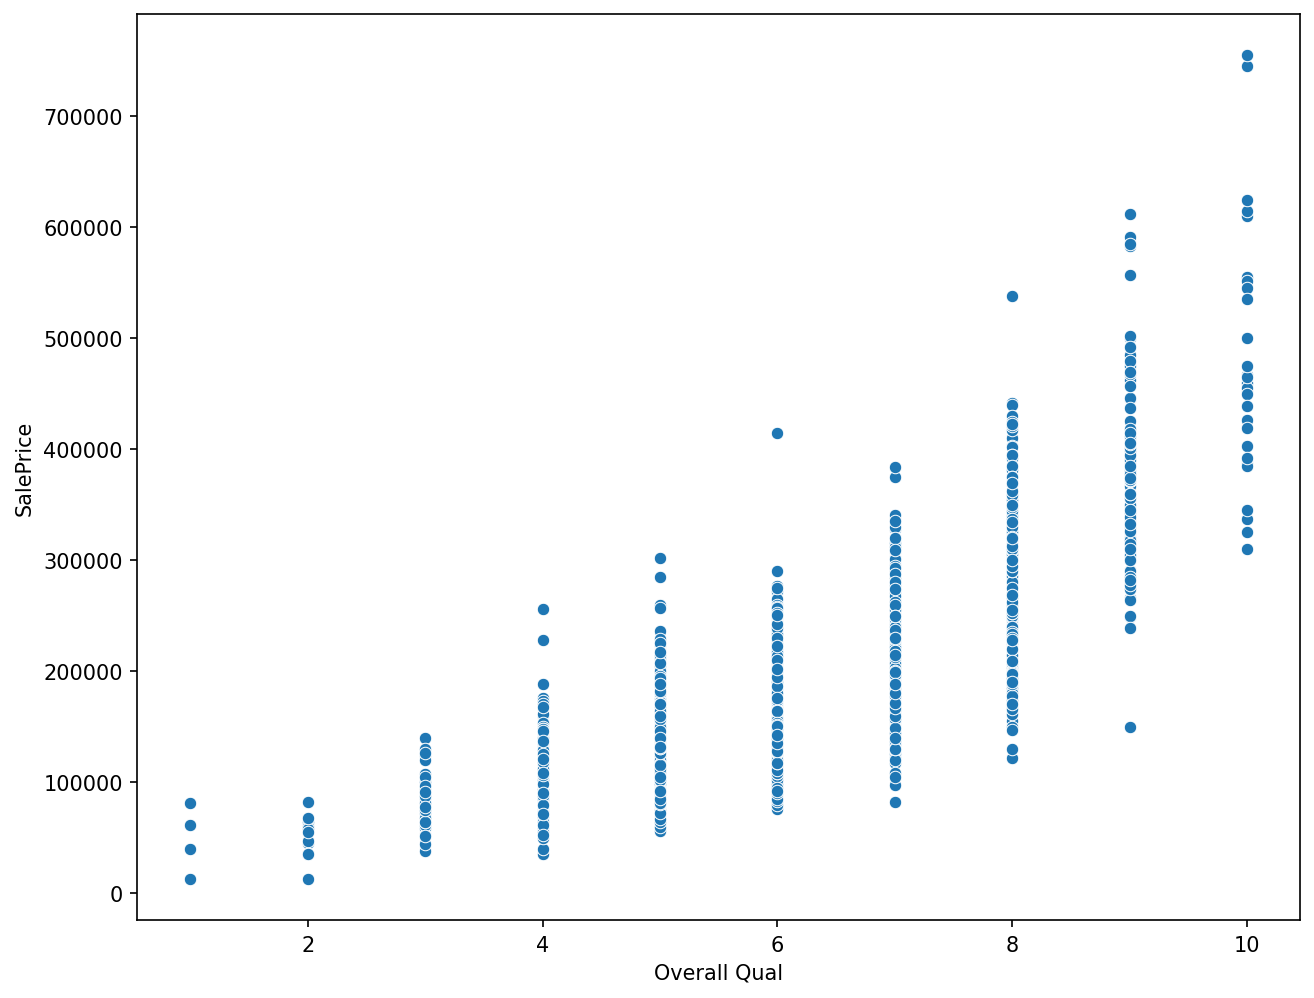

In [19]:
# visualizing the new df with the outlier index dropped
plt.figure(figsize=(10,8),dpi=150)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

# Dealing with missing data

In [20]:
len(df.columns)

81

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [22]:
# dropping PID since we already have an index 
df = df.drop('PID',axis=1)

In [23]:
# observing NaN features
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [24]:
# function to check NaN as a percentage of of the total df
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [25]:
percent_nan = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

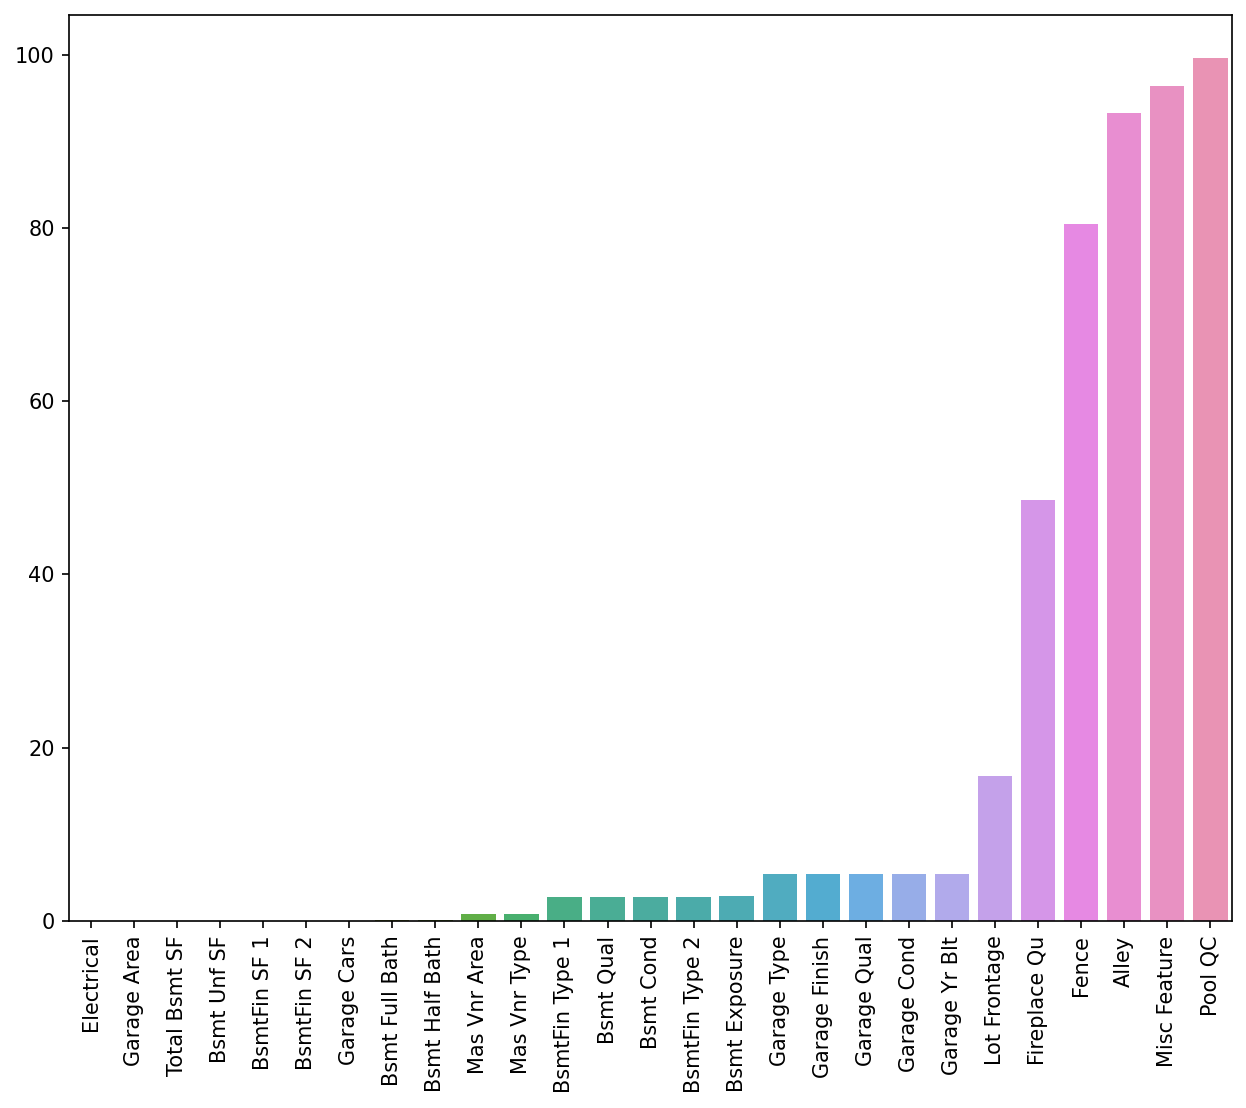

In [26]:
# visualizing missing data of all features as a percentage of the total df
plt.figure(figsize=(10,8),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [27]:
# replacing the missing basement integers with 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [28]:
# replacing the missing basement strings with a none 
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [29]:
# dropping Electrical and Garage cars 
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [30]:
# getting the new percentage of missing data
percent_nan = percent_missing(df)

(0.0, 1.0)

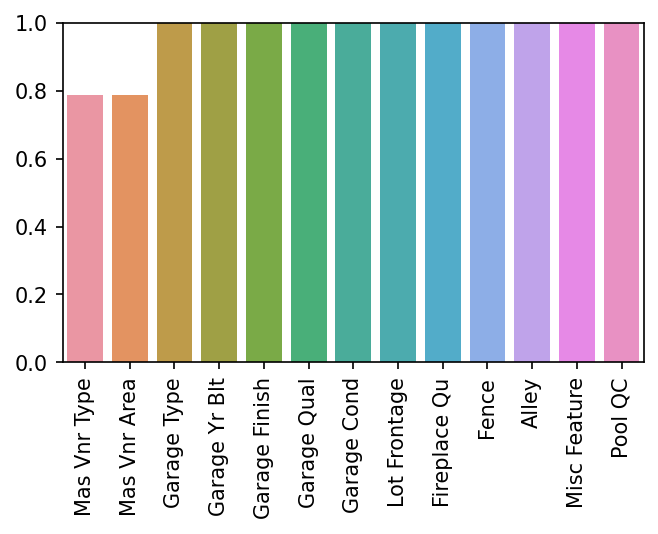

In [31]:
# adjusting our scale of y limit to see how much data it truly missing in terms of %
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [32]:
# filling in the missing Mas Vnr Type data
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [33]:
# reassigning percent nan to get an update of missing data 
percent_nan = percent_missing(df)

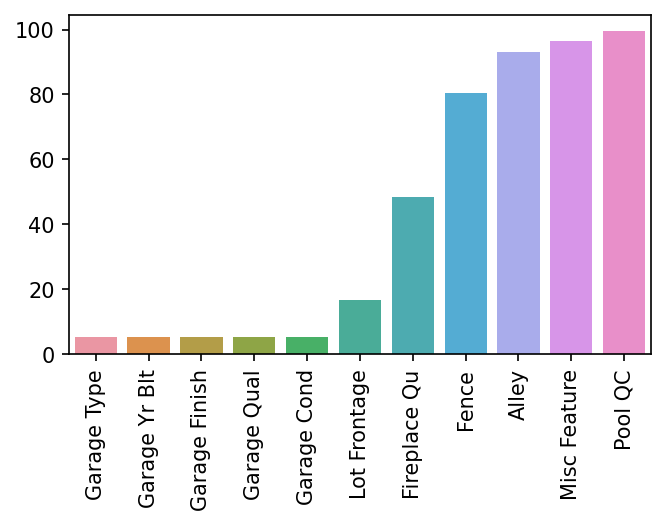

In [34]:
# visualizing updated missing data
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [35]:
# filling in missing garage string information
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [36]:
# filling in missing garage integer information
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [37]:
# updating percent nan
percent_nan = percent_missing(df)

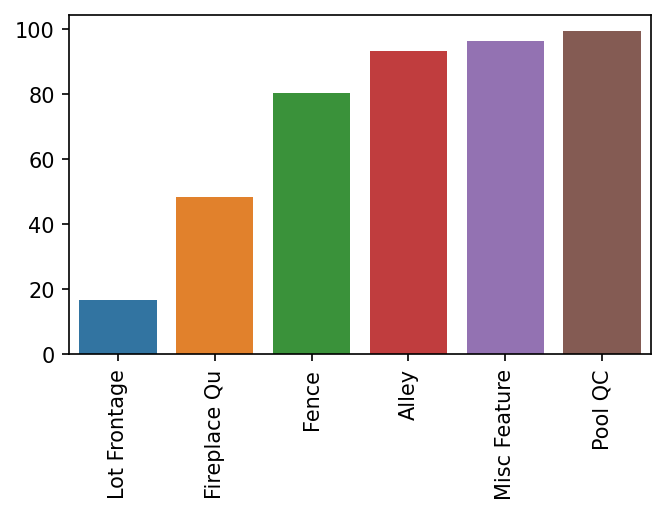

In [38]:
# visualizing updated missing data
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [39]:
# dropping the columns with high percentage of missing data
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [40]:
# updating percent nan
percent_nan = percent_missing(df)

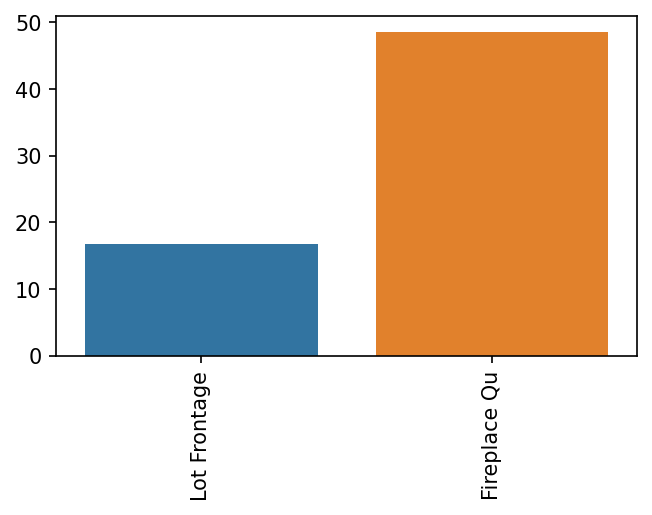

In [41]:
# visualizing updated missing data
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [42]:
# filling in missing fireplace data 
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [43]:
# updating percent nan
percent_nan = percent_missing(df)

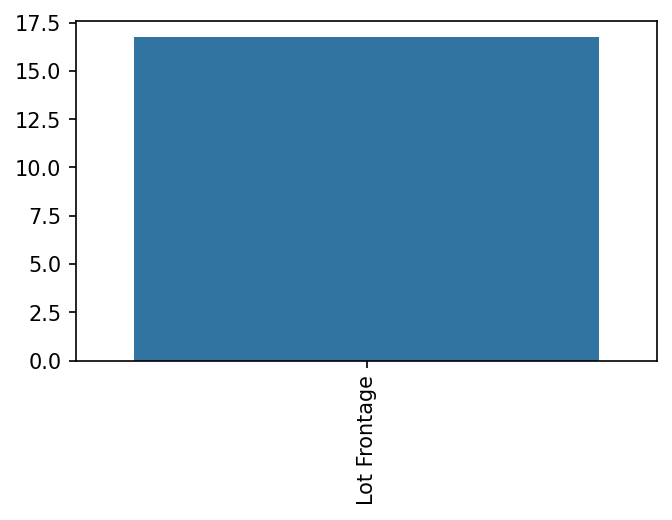

In [44]:
# visualizing updated missing data
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

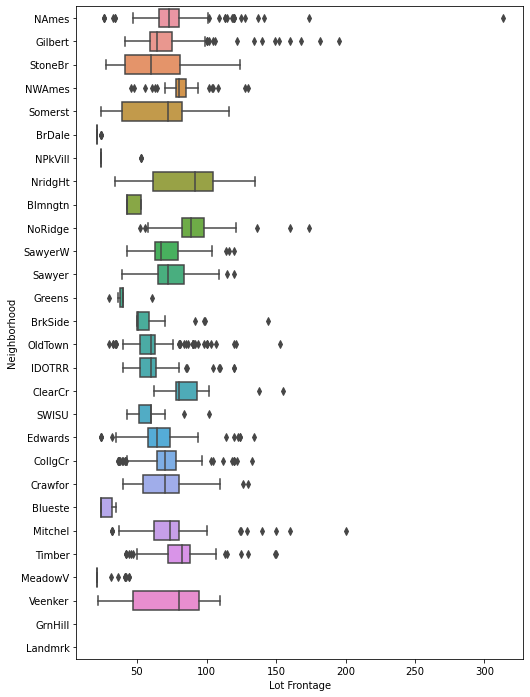

In [45]:
# visualizing the lot frontage for each neighborhood
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [46]:
# looking at the mean for the lot frontage for each neighborhood
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [47]:
# using impute to fill the missing data and tansform to change the columns
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [48]:
# updating percent nan
percent_nan = percent_missing(df)

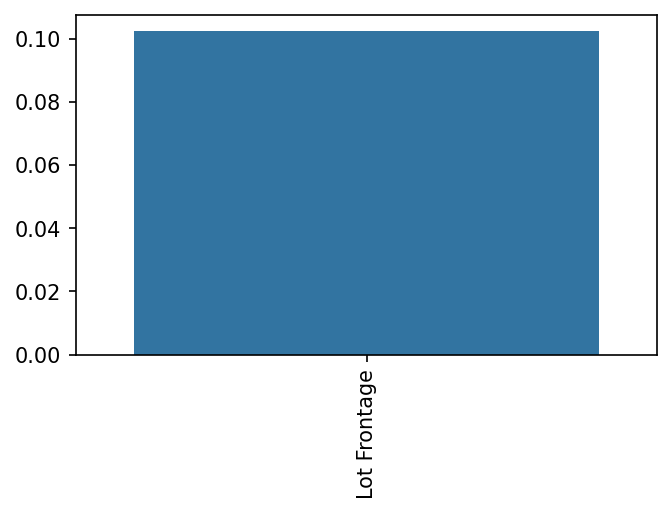

In [49]:
# visualizing updated missing data
plt.figure(figsize=(5,3),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [50]:
# filling the rest of the missing lot frontage with 0
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [51]:
percent_nan = percent_missing(df)

In [52]:
# now no longer have missing data.
percent_nan

Series([], dtype: float64)

# Dealing with Categorical data

In [53]:
# seperating the integers and the strings from the df
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [54]:
# coverting the string df to a categorial df
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [55]:
# combining both df's to create the final df
final_df = pd.concat([df_nums,df_objs],axis=1)

# Model Implementation

In [71]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [72]:
# splitting the data to input an output
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [73]:
# creating the test size and random seed variable
test_size = 0.1
random_state = 101

In [74]:
# splitting the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                     random_state=random_state)

In [75]:
# scaling the data to have a standardized range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# creating an instance of the model
base_enet_model = ElasticNet()

In [77]:
# trying different set of values for the Enet model parameters
param_grid = {'alpha':[0.1,1,5,10,50,100],'l1_ratio':[.1,.5,.7,.9,.95,.99,1]}

In [78]:
# creating the gridsearchCV model 
grid_model = GridSearchCV(estimator=base_enet_model,param_grid=param_grid,cv=5,
                          scoring='neg_mean_squared_error',verbose=2)

In [80]:
# fitting the model to the training dataset
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .

/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118294152758.59558, tolerance: 1355206692.5276787
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.3s
[CV] alpha=0.1, l1_ratio=0.9 .........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158288173751.33536, tolerance: 1307913805.6588454
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.9 .........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127154089116.60748, tolerance: 1415056940.006106
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.9 .........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197091631879.41327, tolerance: 1438198040.088288
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.9 .........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140811185295.13702, tolerance: 1345680018.2551236
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.95 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307089578184.78705, tolerance: 1355206692.5276787
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.95 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330759386432.6491, tolerance: 1307913805.6588454
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.95 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347897523477.2733, tolerance: 1415056940.006106
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.95 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391253322279.83545, tolerance: 1438198040.088288
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.95 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279592387771.1742, tolerance: 1345680018.2551236
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.5s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356548016003.4173, tolerance: 1355206692.5276787
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.7s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366356426285.6542, tolerance: 1307913805.6588454
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.4s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411963081743.0312, tolerance: 1415056940.006106
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.7s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412305558746.4691, tolerance: 1438198040.088288
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.3s
[CV] alpha=0.1, l1_ratio=0.99 ........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359533319236.6412, tolerance: 1345680018.2551236
  positive)


[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351151712256.02484, tolerance: 1355206692.5276787
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362213677727.72925, tolerance: 1307913805.6588454
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410132950427.0074, tolerance: 1415056940.006106
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408438001896.7395, tolerance: 1438198040.088288
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374503820013.9302, tolerance: 1345680018.2551236
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] .

/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280285058321.3031, tolerance: 1355206692.5276787
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311809243720.40283, tolerance: 1307913805.6588454
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351395976691.793, tolerance: 1415056940.006106
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354009742464.7978, tolerance: 1438198040.088288
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264916117324.7377, tolerance: 1345680018.2551236
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] .

/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133404989789.86035, tolerance: 1355206692.5276787
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179813226780.39456, tolerance: 1307913805.6588454
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199192245770.99814, tolerance: 1415056940.006106
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207774864686.30353, tolerance: 1438198040.088288
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12689659750.704956, tolerance: 1345680018.2551236
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] .

/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24975420047.222412, tolerance: 1307913805.6588454
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35361096728.04578, tolerance: 1415056940.006106
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................


/home/faithful/anaconda3/envs/housingpred/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4879052128.621582, tolerance: 1438198040.088288
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] .

[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   22.0s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [81]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [82]:
# testing the model on the training dataset
train_pred = grid_model.predict(X_train)

In [83]:
# calculating the training error
train_error = np.sqrt(mean_squared_error(y_train,train_pred))

In [84]:
# training error result
train_error

19802.69803947116

In [85]:
# testing our model on the test set
y_pred = grid_model.predict(X_test)

In [86]:
test_error = np.sqrt(mean_squared_error(y_test,y_pred))

In [87]:
#  RMSQE for the test set
test_error

20486.625817438726